In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import ll as lr

In [48]:
df=pd.read_excel('AirQualityUCI.xlsx')

In [49]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [51]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [52]:
df.shape

(9357, 15)

In [53]:
df['Date']=pd.to_datetime(df['Date'],format=' %y-%m-%d')
df['Month']=df['Date'].dt.month_name()
df['Time'] = pd.to_datetime(df['Time'],format= '%H:%M:%S').dt.hour
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
0,2004-03-10,18,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,March
1,2004-03-10,19,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,March
2,2004-03-10,20,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,March
3,2004-03-10,21,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,March
4,2004-03-10,22,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,March


<AxesSubplot:>

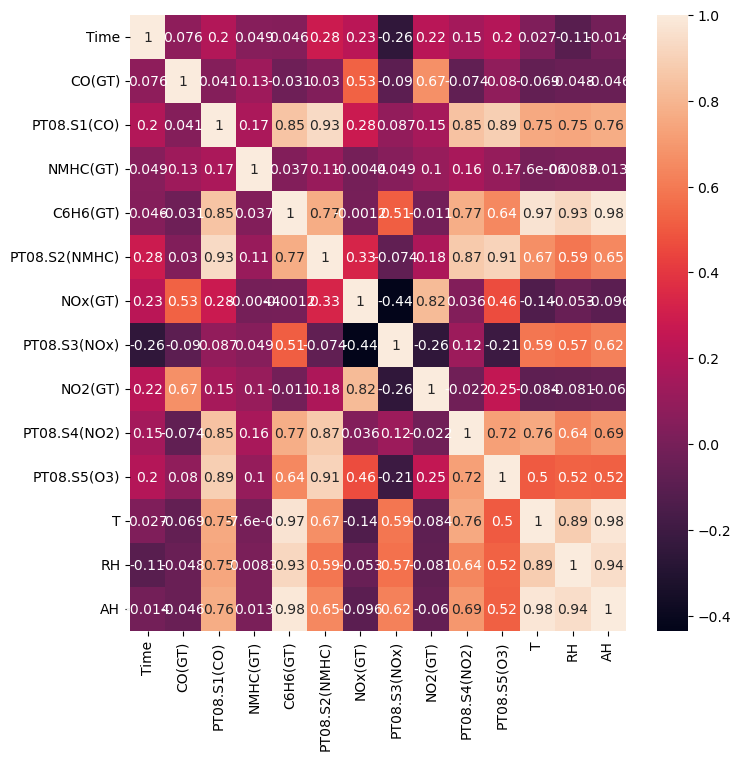

In [54]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

In [55]:
col_=df.columns.tolist()[1:]
X=df[col_].drop('RH',axis=1)
X=df[col_].drop('Time',axis=1)
X=df[col_].drop('Month',axis=1)
y=df['RH'] 

In [56]:
#scaler = StandardScaler()
#model = scaler.fit(X)
#scaled_data = model.transform(data)

In [57]:
ss_x = StandardScaler()
X_std=ss_x.fit_transform(X) 

In [58]:
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.1, random_state=42)

In [59]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

Number of Iterations:0
Cost Function:2101.6253473795573
Number of Iterations:100
Cost Function:1131.3927576880246
Number of Iterations:200
Cost Function:775.3205873763069
Number of Iterations:300
Cost Function:602.1552620723792
Number of Iterations:400
Cost Function:493.16114871798953
Number of Iterations:500
Cost Function:413.3730723841425
Number of Iterations:600
Cost Function:350.8930119621975
Number of Iterations:700
Cost Function:300.5828436700918
Number of Iterations:800
Cost Function:259.5613171094399
Number of Iterations:900
Cost Function:225.8831288525175
Number of Iterations:1000
Cost Function:198.1015655135233
Number of Iterations:1100
Cost Function:175.09204634530337
Number of Iterations:1200
Cost Function:155.96220703418373
Number of Iterations:1300
Cost Function:139.99641516044105
Number of Iterations:1400
Cost Function:126.61723758591401
Number of Iterations:1500
Cost Function:115.35691244913596
Number of Iterations:1600
Cost Function:105.83548148715576
Number of Iterati

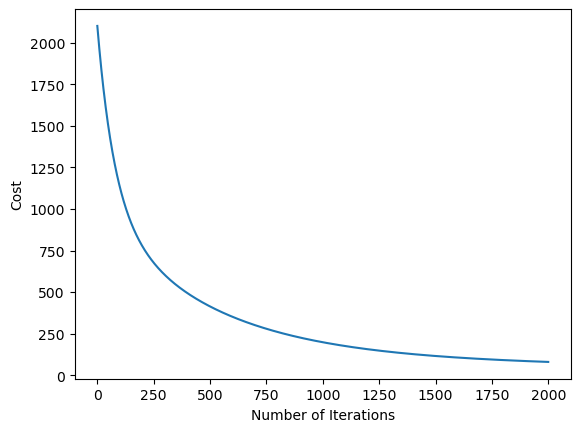

In [60]:
theta=lr.fitGD(X_train,y_train,0.001,0,0,2000)
print(theta)

In [61]:
m,n=np.shape(X_train)
y_predict_train=np.zeros(m)
b=theta[0]
w=theta[1:]
for i in range(m):
    y_predict_train[i]=np.dot(w,X_train[i])+b
error=0
for i in range(m):
    error=error+(y_predict_train[i]-y_train[i])**2
error=error/(2*m)
print("Training Set err:{}".format(error))

Training Set err:79.74790266197394


In [62]:
tr=np.shape(X_test)[0]
y_predict_test=np.zeros(tr)
for i in range(tr):
    y_predict_test[i]=np.dot(w,X_test[i])+b
error_test=0
for i in range(tr):
    error_test=error_test+(y_predict_test[i]-y_test[i])**2
error_test=error_test/(2*tr)
print("Test Set err:{}".format(error_test))

Test Set err:76.72401760597769


In [65]:
theta_normal=lr.fitNormal(X_train,y_train)
print(theta_normal)

[ 3.84833314e-02 -7.86401229e-02  1.48953576e-01 -1.28846296e-01
 -6.97083572e+00  1.94966890e+00  1.11903586e-01  1.55048046e-01
 -1.74950446e-01 -3.02765482e-01 -1.97463932e-01 -2.47538099e-01
  5.12990985e+01  5.75372186e+00]


In [66]:
y_predict_train_n=np.zeros(m)
for i in range(m):
    y_predict_train_n[i]=np.dot(theta_normal,X_train[i])
error_n=0
for i in range(m):
    error_n=error_n+(y_predict_train_n[i]-y_train[i])**2
error_n=error_n/(2*m)
print("Training Set error using Normal Equations:{}".format(error_n))

Training Set error using Normal Equations:779.4228546303385


In [67]:
y_predict_test_n=np.zeros(tr)
for i in range(tr):
    y_predict_test_n[i]=np.dot(theta_normal,X_test[i])
error_test_n=0
for i in range(tr):
    error_test_n=error_test_n+(y_predict_test_n[i]-y_test[i])**2
error_test_n=error_test_n/(2*tr)
print("Test Set error using Normal Equations:{}".format(error_test_n))

Test Set error using Normal Equations:780.5268853829341
